Xavier Mira Fernandez
xmira3@alumno.uned.es

# Trabajo práctico 1

## Preparativos previos

Lo primero será traernos el fichero a hadoop, nos creamos una carpeta en HDFS para contener los ficheros y los copiamos.

In [125]:
!hadoop fs -rm -r /dataset
!hadoop fs -mkdir -p /dataset # creamos ruta para contener los archivos en el HDFS

Deleted /dataset


In [126]:
!ls # deberian estar los CSVs de clients.csv y countries.csv en la ruta local del notebook. Si no estan no funcionara

 API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_4353310.csv
 API_SP.DYN.LE00.IN_DS2_en_csv_v2_4330149.csv
 TP1.ipynb
 clients.csv
 clients_modified.csv
 countries.csv
 invest_id.csv
 life_exp.csv
 mrjob
 mrjob-ejercicio.py
 mrjob-join.ipynb
 ouputlocal
'ouputlocal!'
 pig_indiceinvertido_estudiantes.ipynb
 tp1.py
 tp2.py
 tp3.py


In [127]:
!hadoop fs -copyFromLocal clients.csv /dataset/clients.csv
!hadoop fs -copyFromLocal countries.csv /dataset/countries.csv

In [128]:
!hadoop fs -ls /dataset # ahora deberian aparecer en el HDFS

Found 2 items
-rw-r--r--   3 root supergroup       1289 2022-11-15 21:02 /dataset/clients.csv
-rw-r--r--   3 root supergroup       4120 2022-11-15 21:02 /dataset/countries.csv


In [129]:
!hadoop fs -head /dataset/countries.csv

































































Dominica

In [130]:
!hadoop fs -head /dataset/clients.csv

Bertram Pearcy  ,bueno,SO
Steven Ulman  ,regular,ZA
Enid Follansbee  ,malo,GS
Candie Jacko  ,malo,SS
Alana Zufelt  ,regular,ES
Craig Pinkett  ,malo,LK
Carson Levey  ,bueno,GU
Reanna Calabrese  ,regular,GT
Elliott Kosak  ,malo,GG
Yuette Steinman  ,bueno,GN
Grisel Wines  ,regular,GW
Kathryne Dieguez  ,regular,AE
Donna Raabe  ,malo,GB
Norine Mundt  ,bueno,US
Brittaney Amaro  ,bueno,ES
Penni Husted  ,bueno,ES
Delmer Semon  ,malo,IT
Lennie Dunkerson  ,bueno,CA
Mayra Bobb  ,regular,IT
Altagracia Merced  ,regular,CA
Verda Belgrave  ,malo,GB
Jonnie Urban  ,malo,US
Chung Frankum  ,malo,ES
Vincenzo Samples  ,regular,TT
Dominick Barkan  ,bueno,GU
Carisa Ellingwood  ,bueno,TR
Garret Wess  ,regular,TM
Zoraida Muise  ,bueno,GU
Samantha Cusson  ,bueno,PT
Jenine Greenburg  ,regular,PR
Geri Paddock  ,bueno,QA
Antonia Klosterman  ,regular,RE
Moriah Galey  ,malo,RO
Nyla Eckard  ,malo,GB
Arlean Harries  ,malo,US
Kenyatta Lippold  ,malo,ES
Samuel Knipe  ,malo,MV
Jamison Starner  ,malo,ML
Joel Blye  ,regula

## Ejercicio 1.1

El ejercicio trata de contar el numero de "buenos" que hay en cada pais

In [131]:
%%writefile tp1.py
#!/usr/bin/env python3
import sys, os, re
from mrjob.job import MRJob

class MRJoin(MRJob):
    countries = {}
    
    def mapper(self, _, line):
        splits = line.rstrip("\n").split(",")

        if len(splits) == 2: # datos de paises
            countryCode = splits[1]
            countryName = splits[0]
            self.countries[countryCode] = countryName
        else: #  datos de personas
            name = splits[0]
            vote = splits[1]
            countryCode = splits[2]
            yield countryCode, 1

    def reducer(self, key, values):
        if not key in self.countries:
            yield key, sum(values)
        else:
            yield self.countries[key], sum(values)

if __name__ == '__main__':
    MRJoin.run()

Overwriting tp1.py


In [132]:
! python3 tp1.py countries.csv clients.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/tp1.root.20221115.200253.720417
Running step 1 of 1...
job output is in /tmp/tp1.root.20221115.200253.720417/output
Streaming final output from /tmp/tp1.root.20221115.200253.720417/output...
"TZ"	1
"United States"	4
"VE"	1
"Sri Lanka"	2
"MD"	1
"MK"	1
"Mali"	1
"Malta"	1
"United Arab Emirates"	1
"BO"	1
"BQ"	1
"Canada"	2
"CD"	1
"Maldives"	1
"Puerto Rico"	1
"PS"	1
"Portugal"	1
"Qatar"	1
"R\u00e9union"	1
"South Sudan"	2
"Turkmenistan"	1
"Turkey"	1
"Trinidad and Tobago"	1
"TW"	1
"Guinea-Bissau"	1
"IR"	1
"Italy"	2
"KP"	1
"KR"	1
"FM"	1
"United Kingdom"	4
"Guernsey"	1
"Guinea"	1
"South Georgia and the South Sandwich Islands"	2
"Guatemala"	1
"Guam"	3
"Romania"	1
"Solomon Islands"	1
"SH"	1
"Slovenia"	1
"Somalia"	2
"VG"	1
"VI"	1
"South Africa"	2
"Spain"	7
Removing temp directory /tmp/tp1.root.20221115.200253.720417...


In [133]:
# lo ejecutamos en hadoop
!python3 tp1.py -r hadoop hdfs:///dataset/*

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /app/hadoop-3.3.1/bin...
Found hadoop binary: /app/hadoop-3.3.1/bin/hadoop
Using Hadoop version 3.3.1
Looking for Hadoop streaming jar in /app/hadoop-3.3.1...
Found Hadoop streaming jar: /app/hadoop-3.3.1/share/hadoop/tools/lib/hadoop-streaming-3.3.1.jar
Creating temp directory /tmp/tp1.root.20221115.200254.324534
uploading working dir files to hdfs:///user/root/tmp/mrjob/tp1.root.20221115.200254.324534/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/tp1.root.20221115.200254.324534/files/
Running step 1 of 1...
  packageJobJar: [/tmp/hadoop-unjar2874205704114156532/] [] /tmp/streamjob8020954393303735073.jar tmpDir=null
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1668538429234_0043
  Total 

## Ejercicio 1.2: paises con mejores clientes

devolver el pais con mas valoraciones de bueno, en caso de empate devolver uno cualquiera

En este link se explica cómo hacer un job multi step con combiners. Lo usa para algo parecido, contar el número de palabras aparecidas y devolver el máximo.
[https://mrjob.readthedocs.io/en/latest/guides/writing-mrjobs.html]
Básicamente se trata de, con el mapper devolvemos pares <pais, 1>
Con el combiner sumaremos por clave, lo que dará como salda <pais, k> para cada pais. 
Con el reducer se escribirá Nulo,serializar([<pais, k>])
Con el último reducer se usará max para quedarnos con el máximo

In [134]:
%%writefile tp2.py
#!/usr/bin/env python3
import sys, os, re
from mrjob.job import MRJob
from mrjob.step import MRStep

class MRJoin(MRJob):
    countries = {}
    
    def mapper_countries_goods(self, _, line):
        splits = line.rstrip("\n").split(",")

        if len(splits) == 2: # datos de paises
            countryCode = splits[1]
            countryName = splits[0]
            self.countries[countryCode] = countryName
        else: #  datos de personas
            name = splits[0]
            vote = splits[1]
            countryCode = splits[2]
            yield countryCode, 1

    def combiner_count_goods(self, country, counts):
        # sum the words we've seen so far
        yield (country, sum(counts))

    def reducer_count_goods(self, country, counts):
        # send all (num_occurrences, word) pairs to the same reducer.
        yield None, (sum(counts), country)

    
    def reducer_find_max_goods(self, country, goods_count_pairs):
        # each item is (goods, country),
        # so yielding one results in key=counts, value=country
        max_item = max(goods_count_pairs)
        counts, country = max_item
        if country in self.countries:
            yield counts, self.countries[country]
        else:
            yield counts, country
        

    def steps(self):
        return [
            MRStep(mapper=self.mapper_countries_goods,
                   combiner=self.combiner_count_goods,
                   reducer=self.reducer_count_goods),
            MRStep(reducer=self.reducer_find_max_goods)
        ]
        

if __name__ == '__main__':
    MRJoin.run()

Overwriting tp2.py


In [135]:
! python3 tp2.py countries.csv clients.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/tp2.root.20221115.200323.776468
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/tp2.root.20221115.200323.776468/output
Streaming final output from /tmp/tp2.root.20221115.200323.776468/output...
7	"Spain"
Removing temp directory /tmp/tp2.root.20221115.200323.776468...


Lo que nos dice que el pais con mas valoraciones de "bueno" es Spain. Lo cual valido haciendo una consulta en el propio CSV a mano para comprobarlo
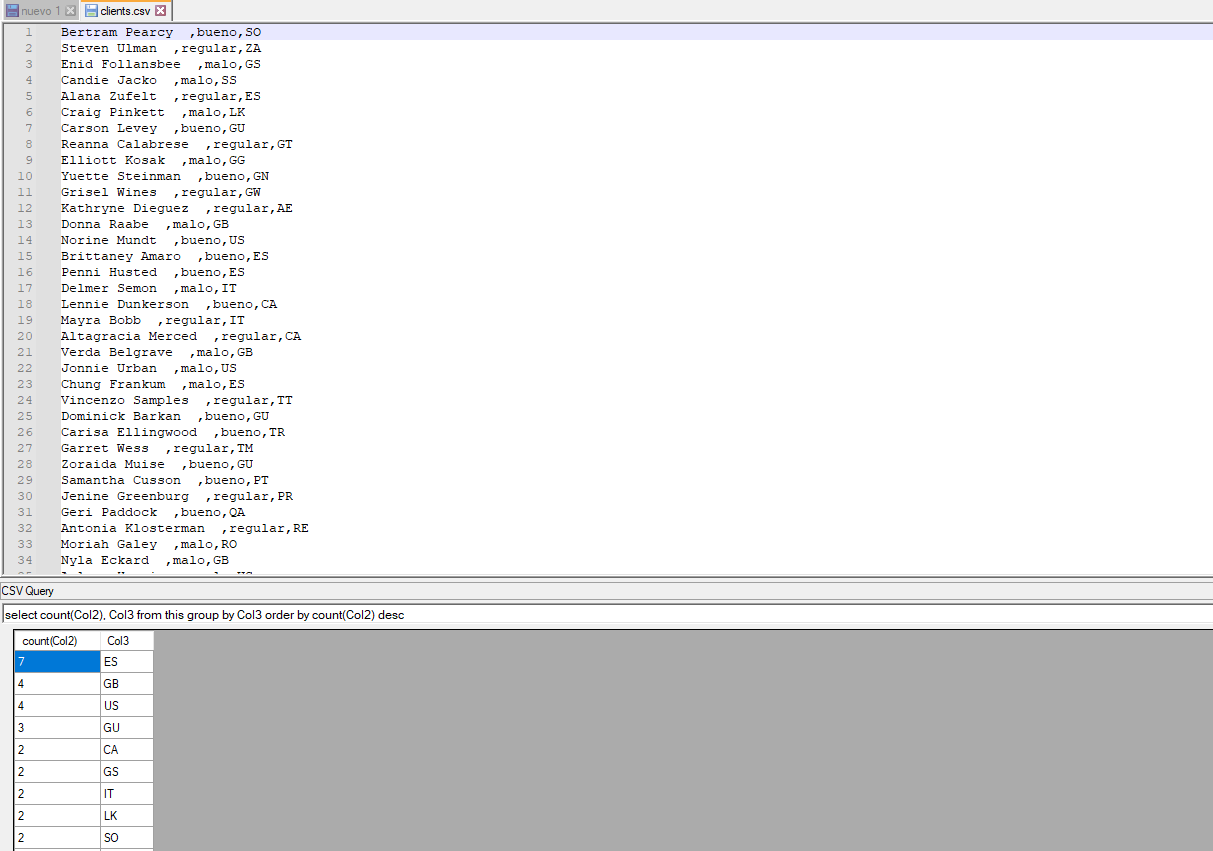

In [136]:
# lo ejecutamos en hadoop
!python3 tp2.py -r hadoop hdfs:///dataset/*

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /app/hadoop-3.3.1/bin...
Found hadoop binary: /app/hadoop-3.3.1/bin/hadoop
Using Hadoop version 3.3.1
Looking for Hadoop streaming jar in /app/hadoop-3.3.1...
Found Hadoop streaming jar: /app/hadoop-3.3.1/share/hadoop/tools/lib/hadoop-streaming-3.3.1.jar
Creating temp directory /tmp/tp2.root.20221115.200324.456653
uploading working dir files to hdfs:///user/root/tmp/mrjob/tp2.root.20221115.200324.456653/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/tp2.root.20221115.200324.456653/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar9186314732430478617/] [] /tmp/streamjob1237677948584128487.jar tmpDir=null
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1668538429234_0044
  Total 

## Ejercicio 1.3 Devolver todos los paises empatados

La idea es ampliar el anterior para que si hay varios paises con el mismo numero de votos se devuelvan todos ellos. Mi idea inicial básicamente es sacar el maximo para conocer cual es el numero de votos y luego simplemente hacer un filter sobre el array para quedarme con aquellos registros que tengan dicho valor

In [137]:
# primero vamos a asegurarnos de que el maximo de ellos no es españa, el siguiente tiene 4 asi que habran 2 
!cp clients.csv clients_modified.csv
!sed -i '/,ES$/d' clients_modified.csv
!head clients_modified.csv
!hadoop fs -copyFromLocal -f clients_modified.csv /dataset/clients_modified.csv
!hadoop fs -head /dataset/clients_modified.csv

Bertram Pearcy  ,bueno,SO
Steven Ulman  ,regular,ZA
Enid Follansbee  ,malo,GS
Candie Jacko  ,malo,SS
Craig Pinkett  ,malo,LK
Carson Levey  ,bueno,GU
Reanna Calabrese  ,regular,GT
Elliott Kosak  ,malo,GG
Yuette Steinman  ,bueno,GN
Grisel Wines  ,regular,GW
Bertram Pearcy  ,bueno,SO
Steven Ulman  ,regular,ZA
Enid Follansbee  ,malo,GS
Candie Jacko  ,malo,SS
Craig Pinkett  ,malo,LK
Carson Levey  ,bueno,GU
Reanna Calabrese  ,regular,GT
Elliott Kosak  ,malo,GG
Yuette Steinman  ,bueno,GN
Grisel Wines  ,regular,GW
Kathryne Dieguez  ,regular,AE
Donna Raabe  ,malo,GB
Norine Mundt  ,bueno,US
Delmer Semon  ,malo,IT
Lennie Dunkerson  ,bueno,CA
Mayra Bobb  ,regular,IT
Altagracia Merced  ,regular,CA
Verda Belgrave  ,malo,GB
Jonnie Urban  ,malo,US
Vincenzo Samples  ,regular,TT
Dominick Barkan  ,bueno,GU
Carisa Ellingwood  ,bueno,TR
Garret Wess  ,regular,TM
Zoraida Muise  ,bueno,GU
Samantha Cusson  ,bueno,PT
Jenine Greenburg  ,regular,PR
Geri Paddock  ,bueno,QA
Antonia Klosterman  ,regular,RE
Moriah Ga

In [138]:
%%writefile tp3.py
#!/usr/bin/env python3
import sys, os, re
from mrjob.job import MRJob
from mrjob.step import MRStep

class MRJoin(MRJob):
    countries = {}
    
    def mapper_countries_goods(self, _, line):
        splits = line.rstrip("\n").split(",")
        #si es un pais nos lo guardamos para posterior consulta, sino emitimos un <pais>,1 para que el combiner sume
        if len(splits) == 2: # datos de paises
            countryCode = splits[1]
            countryName = splits[0]
            self.countries[countryCode] = countryName
        else: #  datos de personas
            name = splits[0]
            vote = splits[1]
            countryCode = splits[2]
            yield countryCode, 1
    
    def combiner_count_goods(self, country, counts):
        # suma de los buenos por paises, esto se le pasa a reducer_count_goods
        yield (country, sum(counts))
    
    def reducer_count_goods(self, country, counts):
        # manda todos los (suma(buenos), pais) al mismo reducer
        yield None, (sum(counts), country)
    
    
    def reducer_find_max_goods(self, _, goods_count_pairs):
        # el reducer final recibe (None, serializado(counts, country))
        items = list(goods_count_pairs)
        max_item = max(items)
        filtered_items = filter(lambda item: item[0] == max_item[0], items)
        for item in filtered_items:
            yield item[0], self.countries[item[1]]
        
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper_countries_goods,
                   combiner=self.combiner_count_goods,
                   reducer=self.reducer_count_goods),
            MRStep(reducer=self.reducer_find_max_goods)
        ]
        

if __name__ == '__main__':
    MRJoin.run()

Overwriting tp3.py


In [139]:
! python3 tp3.py countries.csv clients_modified.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/tp3.root.20221115.200414.662442
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/tp3.root.20221115.200414.662442/output
Streaming final output from /tmp/tp3.root.20221115.200414.662442/output...
4	"United States"
4	"United Kingdom"
Removing temp directory /tmp/tp3.root.20221115.200414.662442...


In [140]:
# lo ejecutamos en hadoop
# antes de ejecutarlo tenemos que cargarnos el clients.csv original para que no interfiera
!hadoop fs -rm /dataset/clients.csv
!python3 tp3.py -r hadoop hdfs:///dataset/*

Deleted /dataset/clients.csv
No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /app/hadoop-3.3.1/bin...
Found hadoop binary: /app/hadoop-3.3.1/bin/hadoop
Using Hadoop version 3.3.1
Looking for Hadoop streaming jar in /app/hadoop-3.3.1...
Found Hadoop streaming jar: /app/hadoop-3.3.1/share/hadoop/tools/lib/hadoop-streaming-3.3.1.jar
Creating temp directory /tmp/tp3.root.20221115.200416.967515
uploading working dir files to hdfs:///user/root/tmp/mrjob/tp3.root.20221115.200416.967515/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/tp3.root.20221115.200416.967515/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar7344833400800486191/] [] /tmp/streamjob308744636038142174.jar tmpDir=null
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Connecting to ResourceManager at yarnmaster/172.18.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job

Looking for history log in hdfs:///tmp/hadoop-yarn/staging...
Looking for history log in /app/hadoop-3.3.1/logs...

Probable cause of failure:

Error: java.lang.RuntimeException: PipeMapRed.waitOutputThreads(): subprocess failed with code 1
	at org.apache.hadoop.streaming.PipeMapRed.waitOutputThreads(PipeMapRed.java:326)
	at org.apache.hadoop.streaming.PipeMapRed.mapRedFinished(PipeMapRed.java:539)
	at org.apache.hadoop.streaming.PipeReducer.close(PipeReducer.java:134)
	at org.apache.hadoop.mapred.ReduceTask.runOldReducer(ReduceTask.java:454)
	at org.apache.hadoop.mapred.ReduceTask.run(ReduceTask.java:393)
	at org.apache.hadoop.mapred.YarnChild$2.run(YarnChild.java:178)
	at java.security.AccessController.doPrivileged(Native Method)
	at javax.security.auth.Subject.doAs(Subject.java:422)
	at org.apache.hadoop.security.UserGroupInformation.doAs(UserGroupInformation.java:1878)
	at org.apache.hadoop.mapred.YarnChild.main(YarnChild.java:172)


Step 2 of 2 failed: Command '['/app/hadoop-3.3.1

In [141]:
!hadoop fs -ls /dataset

Found 2 items
-rw-r--r--   3 root supergroup       1110 2022-11-15 21:04 /dataset/clients_modified.csv
-rw-r--r--   3 root supergroup       4120 2022-11-15 21:02 /dataset/countries.csv


Ejecutandolo en local no falla pero ejecutandolo en hadoop falla aunque no se por qué. Creo que tiene que ver con un mensaje que estoy viendo en el log. Parece que hadoop cuando va a hacer el step 2 le pasa el nombre del reducer y pasa un ']'. 

'/bin/sh -ex setup-wrapper.sh python3 tp3.py --step-num=1 --reducer']' returned non-zero exit status 256


# Ejercicio 2 - Hive

Se trata de
* crear tablas necesarias para almacenar datos. Internas o externas. Decisión razonada.
* Importar los datos en las tablas creadas.
* Crear una vista con pais, nombre, codigo, esperanza de vida en 2018 y su inversión en I+D en 2018
* Crear consultas hive para 
    * esperanza de vida 1960
    * esperanza de vida en pais con menor inversión en I+D en 2010
    * 5 paises con mayor inversión en I+D
    * esperanza de vida del pais con mas inversion media en I+D durante decada de 2000

In [355]:
# probamos la conexion
!beeline -u "jdbc:hive2://localhost:10000/" -e "SHOW DATABASES;"

Connecting to jdbc:hive2://localhost:10000/
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215734_0465aad5-7a20-4a52-ab14-5899b1b5c198): SHOW DATABASES
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:database_name, type:string, comment:from deserializer)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215734_0465aad5-7a20-4a52-ab14-5899b1b5c198); Time taken: 0.028 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215734_0465aad5-7a20-4a52-ab14-5899b1b5c198): SHOW DATABASES
INFO  : Starting task [Stage-0:DDL] in serial mode
INFO  : Completed executing command(queryId=root_20221115215734_0465aad5-7a20-4a52-ab14-5899b1b5c198); T

In [356]:
# creamos una nueva bbdd
!beeline -u "jdbc:hive2://localhost:10000/" -e "create database if not exists trabajo_practico"

Connecting to jdbc:hive2://localhost:10000/
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215737_bbae4751-72d4-41f9-96c7-b35fcb343a1b): create database if not exists trabajo_practico
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:null, properties:null)
INFO  : Completed compiling command(queryId=root_20221115215737_bbae4751-72d4-41f9-96c7-b35fcb343a1b); Time taken: 0.03 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215737_bbae4751-72d4-41f9-96c7-b35fcb343a1b): create database if not exists trabajo_practico
INFO  : Starting task [Stage-0:DDL] in serial mode
INFO  : Completed executing command(queryId=root_20221115215737_bbae4751-72d4-41f9-96c7-b35fcb343a1b); Time ta

In [357]:
!beeline -u "jdbc:hive2://localhost:10000/" -e "describe database extended trabajo_practico"

Connecting to jdbc:hive2://localhost:10000/
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215740_d7195908-624a-4326-9986-c52f0599b3e3): describe database extended trabajo_practico
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:db_name, type:string, comment:from deserializer), FieldSchema(name:comment, type:string, comment:from deserializer), FieldSchema(name:location, type:string, comment:from deserializer), FieldSchema(name:owner_name, type:string, comment:from deserializer), FieldSchema(name:owner_type, type:string, comment:from deserializer), FieldSchema(name:parameters, type:string, comment:from deserializer)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215740_d7195908-624a-4326-9986-c5

In [358]:
# vamos a crear tablas internas, no tenemos necesidad a priori de las funcionalidades de las tablas externas
# !beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
# -e "drop table if exists life_exp; create table life_exp (country string, country_code string, indicator_code string, $(seq -f 'year_%g float' 1960 2021 | paste -sd "," -)) comment 'esperanza de vida 1960 y 1961' row format delimited fields terminated by ',' TBLPROPERTIES('Author' = 'XMF')"
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "drop table if exists life_exp; create table life_exp (country string, country_code string, indicator_code string, $(seq -f 'year_%g float' 1960 2021 | paste -sd "," -)) comment 'esperanza de vida 1960 y 1961' row format SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde' WITH SERDEPROPERTIES (   'separatorChar' = ',', 'quoteChar' = '\"') STORED AS TEXTFILE TBLPROPERTIES('Author' = 'XMF', 'skip.header.line.count'='1')"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215742_cbc2b0b8-d2a1-4971-b602-729bbc0961ed): drop table if exists life_exp
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:null, properties:null)
INFO  : Completed compiling command(queryId=root_20221115215742_cbc2b0b8-d2a1-4971-b602-729bbc0961ed); Time taken: 0.032 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215742_cbc2b0b8-d2a1-4971-b602-729bbc0961ed): drop table if exists life_exp
INFO  : Starting task [Stage-0:DDL] in serial mode
INFO  : Completed executing command(queryId=root_20221115215742_cbc2b0b8-d2a1-4971-b602-729bbc0961ed); Time taken: 0.049 second

In [359]:
# !beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
# -e "drop table if exists invest_id; create table invest_id (country string, country_code string, indicator_code string, $(seq -f 'year_%g double' 1960 2021 | paste -sd "," -)) comment 'I+D 1960 y 1961' row format delimited fields terminated by ',' lines terminated by '\n' TBLPROPERTIES('Author' = 'XMF', 'skip.header.line.count' = '1')"
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "drop table if exists invest_id; create table invest_id (country string, country_code string, indicator_code string, $(seq -f 'year_%g float' 1960 2021 | paste -sd "," -)) comment 'inversion en i+d' row format SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde' WITH SERDEPROPERTIES (   'separatorChar' = ',', 'quoteChar' = '\"') STORED AS TEXTFILE TBLPROPERTIES('Author' = 'XMF', 'skip.header.line.count'='1')"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215745_89ed04bd-0abe-4ee2-baa9-a1652561b515): drop table if exists invest_id
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:null, properties:null)
INFO  : Completed compiling command(queryId=root_20221115215745_89ed04bd-0abe-4ee2-baa9-a1652561b515); Time taken: 0.033 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215745_89ed04bd-0abe-4ee2-baa9-a1652561b515): drop table if exists invest_id
INFO  : Starting task [Stage-0:DDL] in serial mode
INFO  : Completed executing command(queryId=root_20221115215745_89ed04bd-0abe-4ee2-baa9-a1652561b515); Time taken: 0.055 seco

In [360]:
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "describe extended invest_id"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215748_d201ea7b-2f7a-41b6-a951-eb966cdc4bfd): describe extended invest_id
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:col_name, type:string, comment:from deserializer), FieldSchema(name:data_type, type:string, comment:from deserializer), FieldSchema(name:comment, type:string, comment:from deserializer)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215748_d201ea7b-2f7a-41b6-a951-eb966cdc4bfd); Time taken: 0.036 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215748_d201ea7b-2f7a-41b6-a951-eb966cdc4bfd): describe e

In [361]:
# nos aseguramos de que tenemos los ficheros en la ruta local para copiarlos, deberian aparecer los archivos csv  API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_4353310.csv y API_SP.DYN.LE00.IN_DS2_en_csv_v2_4330149.csv
!ls 

 API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_4353310.csv
 API_SP.DYN.LE00.IN_DS2_en_csv_v2_4330149.csv
 TP1.ipynb
 clients.csv
 clients_modified.csv
 countries.csv
 invest_id.csv
 life_exp.csv
 mrjob
 mrjob-ejercicio.py
 mrjob-join.ipynb
 ouputlocal
'ouputlocal!'
 pig_indiceinvertido_estudiantes.ipynb
 tp1.py
 tp2.py
 tp3.py


In [362]:
!hadoop fs -rm -r /user/root/invest_id.csv
!hadoop fs -rm -r /user/root/life_exp.csv

rm: `/user/root/invest_id.csv': No such file or directory
rm: `/user/root/life_exp.csv': No such file or directory


In [363]:
!cp API_GB.XPD.RSDV.GD.ZS_DS2_en_csv_v2_4353310.csv invest_id.csv
!cp API_SP.DYN.LE00.IN_DS2_en_csv_v2_4330149.csv life_exp.csv
# !head life_exp.csv

In [364]:
# for f in ("life_exp.csv", "invest_id.csv"):
#     lines = []
#     with open(f, "r") as fd:
#         lines = fd.readlines()
#         lines = lines[1:]
    
#     with open(f, "w") as fd:
#         fd.writelines(lines)


In [365]:
# !head invest_id.csv
# !head life_exp.csv

In [387]:
!hadoop fs -copyFromLocal invest_id.csv /user/root/invest_id.csv
!hadoop fs -copyFromLocal life_exp.csv /user/root/life_exp.csv

In [388]:
# !hadoop fs -ls /user/root
!hadoop fs -head /user/root/life_exp.csv

Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,68.784,69.14,69.498,69.851,70.191,70.519,70.833,71.14,71.441,71.736,72.023,72.293,72.538,72.751,72.929,73.071,73.181,73.262,73.325,73.378,73.425,73.468,73.509,73.544,73.573,73.598,73.622,73.646,73.671,73.7,73.738,73.787,73.853,73.937,74.038,74.156,74.287,74.429,74.576,74.725,74.872,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.01,76.152,76.293,76.434,
Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.7160525263364,43.1669350691766,43.6039902540244,44.0

In [389]:
# empezamos a importar los datos
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "load data inpath '/user/root/invest_id.csv' overwrite into table invest_id;load data inpath '/user/root/life_exp.csv' overwrite into table life_exp;"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115220134_003daa15-f905-48bb-84c3-751155e5ea29): load data inpath '/user/root/invest_id.csv' overwrite into table invest_id
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:null, properties:null)
INFO  : Completed compiling command(queryId=root_20221115220134_003daa15-f905-48bb-84c3-751155e5ea29); Time taken: 0.037 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115220134_003daa15-f905-48bb-84c3-751155e5ea29): load data inpath '/user/root/invest_id.csv' overwrite into table invest_id
INFO  : Starting task [Stage-0:MOVE] in serial mode
INFO  : Loading data to table trabaj

In [390]:
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select * from invest_id limit 10";

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115220143_a1e4713e-0fea-4b1b-a421-4cb1101d3ddf): select * from invest_id limit 10
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:invest_id.country, type:string, comment:null), FieldSchema(name:invest_id.country_code, type:string, comment:null), FieldSchema(name:invest_id.indicator_code, type:string, comment:null), FieldSchema(name:invest_id.year_1960, type:string, comment:null), FieldSchema(name:invest_id.year_1961, type:string, comment:null), FieldSchema(name:invest_id.year_1962, type:string, comment:null), FieldSchema(name:invest_id.year_1963, type:string, comment:null), FieldSchema(name:invest_id.year_1964, type:stri

In [371]:
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select * from life_exp limit 10";

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215808_f7059cdb-4416-4a9b-aa65-4d563015baf9): select * from life_exp limit 10
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:life_exp.country, type:string, comment:null), FieldSchema(name:life_exp.country_code, type:string, comment:null), FieldSchema(name:life_exp.indicator_code, type:string, comment:null), FieldSchema(name:life_exp.year_1960, type:string, comment:null), FieldSchema(name:life_exp.year_1961, type:string, comment:null), FieldSchema(name:life_exp.year_1962, type:string, comment:null), FieldSchema(name:life_exp.year_1963, type:string, comment:null), FieldSchema(name:life_exp.year_1964, type:string, comme

Beeline version 3.1.2 by Apache Hive
Closing: 0: jdbc:hive2://localhost:10000/trabajo_practico


In [372]:
# 2.3 crear una vista 
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select t1.country_code, t1.country, t1.year_2018 as inv_2018, t2.year_2018 as life_exp_2018 from invest_id t1, life_exp t2 where t1.country_code = t2.country_code limit 10"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215811_7431c370-8ba6-4eb0-9dbd-39643490758f): select t1.country_code, t1.country, t1.year_2018 as inv_2018, t2.year_2018 as life_exp_2018 from invest_id t1, life_exp t2 where t1.country_code = t2.country_code limit 10
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:t1.country_code, type:string, comment:null), FieldSchema(name:t1.country, type:string, comment:null), FieldSchema(name:inv_2018, type:string, comment:null), FieldSchema(name:life_exp_2018, type:string, comment:null)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215811_7431c370-8ba6-4eb0-9dbd-39643490758f); Time taken: 0.14 seco

In [373]:
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "drop view vista_2018; create view vista_2018 as select t1.country_code, t1.country, t1.year_2018 as inv_2018, t2.year_2018 as life_exp_2018 from invest_id t1, life_exp t2 where t1.country_code = t2.country_code"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215828_4ff76437-9d7a-4e09-a9af-8de0745be59c): drop view vista_2018
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:null, properties:null)
INFO  : Completed compiling command(queryId=root_20221115215828_4ff76437-9d7a-4e09-a9af-8de0745be59c); Time taken: 0.033 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215828_4ff76437-9d7a-4e09-a9af-8de0745be59c): drop view vista_2018
INFO  : Starting task [Stage-0:DDL] in serial mode
INFO  : Completed executing command(queryId=root_20221115215828_4ff76437-9d7a-4e09-a9af-8de0745be59c); Time taken: 0.054 seconds
INFO  : OK
INFO 

In [374]:
# comprobar que la vista está correctamente creada
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select * from vista_2018 limit 10"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215831_8c565af8-dd6b-484d-b52d-b5b20732bd81): select * from vista_2018 limit 10
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:vista_2018.country_code, type:string, comment:null), FieldSchema(name:vista_2018.country, type:string, comment:null), FieldSchema(name:vista_2018.inv_2018, type:string, comment:null), FieldSchema(name:vista_2018.life_exp_2018, type:string, comment:null)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215831_8c565af8-dd6b-484d-b52d-b5b20732bd81); Time taken: 0.141 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(que

In [375]:
# 2.4 EV 1960 españa
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select year_1970 from life_exp where country_code = 'ESP'"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215849_d462e794-026b-45c6-b5da-f1619da45761): select year_1970 from life_exp where country_code = 'ESP'
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:year_1970, type:string, comment:null)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215849_d462e794-026b-45c6-b5da-f1619da45761); Time taken: 0.088 seconds
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Executing command(queryId=root_20221115215849_d462e794-026b-45c6-b5da-f1619da45761): select year_1970 from life_exp where country_code = 'ESP'
INFO  : Completed executing command(queryId=root_20221115215849_d462e7

In [376]:
# 2.4 esperanza de vida del pais con menor inversion en id en 2010
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select le.country_code, le.year_2010, id.year_2010 from life_exp as le inner join invest_id id on le.country_code = id.country_code where id.year_2010 is not null and id.year_2010 > 0 order by id.year_2010 asc limit 1"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215852_c90ca805-e462-4367-923a-7ff1a0596949): select le.country_code, le.year_2010, id.year_2010 from life_exp as le inner join invest_id id on le.country_code = id.country_code where id.year_2010 is not null and id.year_2010 > 0 order by id.year_2010 asc limit 1
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:le.country_code, type:string, comment:null), FieldSchema(name:le.year_2010, type:string, comment:null), FieldSchema(name:id.year_2010, type:string, comment:null)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215852_c90ca805-e462-4367-923a-7ff1a0596949); Time taken: 0.175 seconds
INF

In [377]:
# 2.4 Cinco paises con mayor inversion en I+D 2010
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select le.country_code, le.year_2010, id.year_2010 from life_exp as le inner join invest_id id on le.country_code = id.country_code where id.year_2010 is not null and id.year_2010 > 0 order by id.year_2010 desc limit 5"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115215914_cf1c95f6-8d96-42b4-ab33-b823c1aef5a9): select le.country_code, le.year_2010, id.year_2010 from life_exp as le inner join invest_id id on le.country_code = id.country_code where id.year_2010 is not null and id.year_2010 > 0 order by id.year_2010 desc limit 5
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:le.country_code, type:string, comment:null), FieldSchema(name:le.year_2010, type:string, comment:null), FieldSchema(name:id.year_2010, type:string, comment:null)], properties:null)
INFO  : Completed compiling command(queryId=root_20221115215914_cf1c95f6-8d96-42b4-ab33-b823c1aef5a9); Time taken: 0.16 seconds
INF

In [392]:
#2.4 Esperanza de vida del pais que tiene la mayor inversion media en ID durante la decada de los 2000
!beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
-e "select le.country_code, (year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_2007 + year_2008 + year_2009 + year_2010) / 10 as avg_el from life_exp le where le.country_code = (select inv.country_code from invest_id inv order by (year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_2007 + year_2008 + year_2009 + year_2010) desc limit 1)"

Connecting to jdbc:hive2://localhost:10000/trabajo_practico
Connected to: Apache Hive (version 3.1.2)
Driver: Hive JDBC (version 3.1.2)
Transaction isolation: TRANSACTION_REPEATABLE_READ
INFO  : Compiling command(queryId=root_20221115221140_95633944-7757-46cb-8fe7-ac5f947ff273): select le.country_code, (year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_2007 + year_2008 + year_2009 + year_2010) / 10 as avg_el from life_exp le where le.country_code = (select inv.country_code from invest_id inv order by (year_2000 + year_2001 + year_2002 + year_2003 + year_2004 + year_2005 + year_2006 + year_2007 + year_2008 + year_2009 + year_2010) desc limit 1)
INFO  : Concurrency mode is disabled, not creating a lock manager
INFO  : Warning: Map Join MAPJOIN[57][bigTable=?] in task 'Stage-9:MAPRED' is a cross product
INFO  : Semantic Analysis Completed (retrial = false)
INFO  : Returning Hive schema: Schema(fieldSchemas:[FieldSchema(name:le.country_code, type:stri

INFO  : 2022-11-15 22:12:50,943 Stage-6 map = 100%,  reduce = 0%, Cumulative CPU 1.88 sec
INFO  : MapReduce Total cumulative CPU time: 1 seconds 880 msec
INFO  : Ended Job = job_1668538429234_0082
INFO  : MapReduce Jobs Launched: 
INFO  : Stage-Stage-3: Map: 1  Reduce: 1   Cumulative CPU: 3.34 sec   HDFS Read: 111684 HDFS Write: 114 SUCCESS
INFO  : Stage-Stage-5: Map: 1  Reduce: 1   Cumulative CPU: 4.17 sec   HDFS Read: 111293 HDFS Write: 117 SUCCESS
INFO  : Stage-Stage-4: Map: 1  Reduce: 1   Cumulative CPU: 3.5 sec   HDFS Read: 6914 HDFS Write: 112 SUCCESS
INFO  : Stage-Stage-9: Map: 1   Cumulative CPU: 1.42 sec   HDFS Read: 7688 HDFS Write: 36454 SUCCESS
INFO  : Stage-Stage-6: Map: 1   Cumulative CPU: 1.88 sec   HDFS Read: 48023 HDFS Write: 121 SUCCESS
INFO  : Total MapReduce CPU Time Spent: 14 seconds 310 msec
INFO  : Completed executing command(queryId=root_20221115221140_95633944-7757-46cb-8fe7-ac5f947ff273); Time taken: 71.688 seconds
INFO  : OK
INFO  : Concurrency mode is disabl

In [380]:
# !beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
# -e "drop table if exists life_exp; create table life_exp (country string, country_code string, indicator_code string, $(seq -f 'year_%g float' 1960 2021 | paste -sd "," -)) comment 'esperanza de vida 1960 y 1961' row format SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde' WITH SERDEPROPERTIES (   'separatorChar' = ',', 'quoteChar' = '\"') STORED AS TEXTFILE location '/user/root/life_exp.csv' TBLPROPERTIES('Author' = 'XMF', 'skip.header.line.count'='1')"

In [381]:
# !beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
# -e "select * from life_exp limit 10"

In [382]:
# !hadoop fs -head /user/root/life_exp.csv

In [383]:
# !beeline -u "jdbc:hive2://localhost:10000/trabajo_practico" \
# -e "drop table life_exp.csv"

In [384]:
!hadoop fs -ls /user/root/

Found 1 items
drwxr-xr-x   - root supergroup          0 2022-11-15 20:05 /user/root/tmp
